In [134]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [135]:
merged_df = pd.read_csv('/content/Agmarknet - Sheet1 (1).csv')

In [136]:
merged_df.head()

,Date,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,01-Jan-2023,Onion,Karnataka,Bangalore,0,"0,0",13.606.753,NaN,NaN,NaN
1,02-Jan-2023,Onion,Karnataka,Bangalore,0,"2983,0",13.606.753,500.0,1000.0,700.0
2,03-Jan-2023,Onion,Karnataka,Bangalore,0,"5420,0",13.606.753,500.0,800.0,700.0
3,04-Jan-2023,Onion,Karnataka,Bangalore,0,"7619,0",13.606.753,500.0,800.0,700.0
4,05-Jan-2023,Onion,Karnataka,Bangalore,0,"9881,0",13.606.753,500.0,800.0,700.0


In [137]:
merged_df['Date']

0       01-Jan-2023
1       02-Jan-2023
2       03-Jan-2023
3       04-Jan-2023
4       05-Jan-2023
           ...     
2881    21-Apr-2024
2882    22-Apr-2024
2883    23-Apr-2024
2884    24-Apr-2024
2885    25-Apr-2024
Name: Date, Length: 2886, dtype: object

In [138]:
merged_df['Total_Arrival'] = merged_df['Total_Arrival'].str.replace(',','').astype(int)

In [139]:
merged_df['Total_Arrival'] = merged_df['Total_Arrival']/10

In [84]:
# Assuming the DataFrame is named merged_df and the column containing numbers with dots is 'Population'
merged_df['Population'] = merged_df['Population'].str.replace('.', '').astype(int)


In [86]:
merged_df.head(5)

,Date,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,2023-01-01,Onion,Karnataka,Bangalore,0,0.0,13606753,NaN,NaN,NaN
1,2023-01-02,Onion,Karnataka,Bangalore,0,2983.0,13606753,500.0,1000.0,700.0
2,2023-01-03,Onion,Karnataka,Bangalore,0,5420.0,13606753,500.0,800.0,700.0
3,2023-01-04,Onion,Karnataka,Bangalore,0,7619.0,13606753,500.0,800.0,700.0
4,2023-01-05,Onion,Karnataka,Bangalore,0,9881.0,13606753,500.0,800.0,700.0


In [87]:
for col in ['MinPrice', 'MaxPrice', 'ModalPrice']:
    # Calculate average of top and bottom values if present
    top_value = merged_df[col].dropna().iloc[-1] if not pd.isna(merged_df[col].iloc[-1]) else None
    bottom_value = merged_df[col].dropna().iloc[0] if not pd.isna(merged_df[col].iloc[0]) else None
    if top_value is not None and bottom_value is not None:
        average_value = (top_value + bottom_value) / 2
    else:
        average_value = top_value or bottom_value

    # Fill NaN values with the calculated average or a single value
    merged_df[col].fillna(average_value, inplace=True)


In [88]:
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.strftime('%Y-%m-%d')
merged_df['Commodity'] = merged_df['Commodity'].astype('category').cat.codes
merged_df['State'] = merged_df['State'].astype('category').cat.codes
merged_df['District'] = merged_df['District'].astype('category').cat.codes
merged_df['Market'] = merged_df['Market'].astype('category').cat.codes

# Display the encoded DataFrame
print(merged_df.head())

         Date  Commodity  State  District  Market  Total_Arrival  Population  \
0  2023-01-01          0      0         0       0            0.0    13606753   
1  2023-01-02          0      0         0       0         2983.0    13606753   
2  2023-01-03          0      0         0       0         5420.0    13606753   
3  2023-01-04          0      0         0       0         7619.0    13606753   
4  2023-01-05          0      0         0       0         9881.0    13606753   

   MinPrice  MaxPrice  ModalPrice  
0    1800.0    1900.0      1850.0  
1     500.0    1000.0       700.0  
2     500.0     800.0       700.0  
3     500.0     800.0       700.0  
4     500.0     800.0       700.0  


Models

In [89]:
merged_df = merged_df.drop(['Date'], axis=1)
merged_df

,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,0,0,0,0,0.0,13606753,1800.0,1900.0,1850.0
1,0,0,0,0,2983.0,13606753,500.0,1000.0,700.0
2,0,0,0,0,5420.0,13606753,500.0,800.0,700.0
3,0,0,0,0,7619.0,13606753,500.0,800.0,700.0
4,0,0,0,0,9881.0,13606753,500.0,800.0,700.0
...,...,...,...,...,...,...,...,...,...
2881,2,1,1,0,43329.5,4038000,1800.0,1900.0,1850.0
2882,2,1,1,0,43366.5,4038000,1850.0,1950.0,1900.0
2883,2,1,1,0,43418.5,4038000,1850.0,1950.0,1900.0
2884,2,1,1,0,43478.5,4038000,1800.0,1900.0,1850.0


In [90]:
x_data = merged_df[['Commodity','State','District','Market','Population','MinPrice','MaxPrice','Total_Arrival']]
y_data = merged_df['ModalPrice']

In [91]:
print(x_data)

      Commodity  State  District  Market  Population  MinPrice  MaxPrice  \
0             0      0         0       0    13606753    1800.0    1900.0   
1             0      0         0       0    13606753     500.0    1000.0   
2             0      0         0       0    13606753     500.0     800.0   
3             0      0         0       0    13606753     500.0     800.0   
4             0      0         0       0    13606753     500.0     800.0   
...         ...    ...       ...     ...         ...       ...       ...   
2881          2      1         1       0     4038000    1800.0    1900.0   
2882          2      1         1       0     4038000    1850.0    1950.0   
2883          2      1         1       0     4038000    1850.0    1950.0   
2884          2      1         1       0     4038000    1800.0    1900.0   
2885          2      1         1       0     4038000    1800.0    1900.0   

      Total_Arrival  
0               0.0  
1            2983.0  
2            5420.0  

Support Vector Regression

In [92]:
merged_df

,Commodity,State,District,Market,Total_Arrival,Population,MinPrice,MaxPrice,ModalPrice
0,0,0,0,0,0.0,13606753,1800.0,1900.0,1850.0
1,0,0,0,0,2983.0,13606753,500.0,1000.0,700.0
2,0,0,0,0,5420.0,13606753,500.0,800.0,700.0
3,0,0,0,0,7619.0,13606753,500.0,800.0,700.0
4,0,0,0,0,9881.0,13606753,500.0,800.0,700.0
...,...,...,...,...,...,...,...,...,...
2881,2,1,1,0,43329.5,4038000,1800.0,1900.0,1850.0
2882,2,1,1,0,43366.5,4038000,1850.0,1950.0,1900.0
2883,2,1,1,0,43418.5,4038000,1850.0,1950.0,1900.0
2884,2,1,1,0,43478.5,4038000,1800.0,1900.0,1850.0


**Deep** **Learning** **Models**

In [93]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state=9)

In [95]:
x_data

,Commodity,State,District,Market,Population,MinPrice,MaxPrice,Total_Arrival
0,0,0,0,0,13606753,1800.0,1900.0,0.0
1,0,0,0,0,13606753,500.0,1000.0,2983.0
2,0,0,0,0,13606753,500.0,800.0,5420.0
3,0,0,0,0,13606753,500.0,800.0,7619.0
4,0,0,0,0,13606753,500.0,800.0,9881.0
...,...,...,...,...,...,...,...,...
2881,2,1,1,0,4038000,1800.0,1900.0,43329.5
2882,2,1,1,0,4038000,1850.0,1950.0,43366.5
2883,2,1,1,0,4038000,1850.0,1950.0,43418.5
2884,2,1,1,0,4038000,1800.0,1900.0,43478.5


In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [97]:
model = Sequential()
# model.add(Dense(128, input_dim=1, activation='relu'))
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1152      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
history = model.fit(x_train_scaled, y_train, epochs =100, validation_data=(x_test_scaled, y_test))

Epoch 1/100
68/68 [==============================] - 1s 6ms/step - loss: 4847244.5000 - mse: 4847244.5000 - val_loss: 4562321.0000 - val_mse: 4562321.0000
Epoch 2/100
68/68 [==============================] - 0s 3ms/step - loss: 4631096.0000 - mse: 4631096.0000 - val_loss: 4141635.0000 - val_mse: 4141635.0000
Epoch 3/100
68/68 [==============================] - 0s 3ms/step - loss: 3863493.5000 - mse: 3863493.5000 - val_loss: 3035589.2500 - val_mse: 3035589.2500
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 2447033.7500 - mse: 2447033.7500 - val_loss: 1539169.1250 - val_mse: 1539169.1250
Epoch 5/100
68/68 [==============================] - 0s 3ms/step - loss: 1000035.8750 - mse: 1000035.8750 - val_loss: 486848.1250 - val_mse: 486848.1250
Epoch 6/100
68/68 [==============================] - 0s 3ms/step - loss: 303934.2812 - mse: 303934.2812 - val_loss: 195518.5312 - val_mse: 195518.5312
Epoch 7/100
68/68 [==============================] - 0s 3ms/step - loss: 144

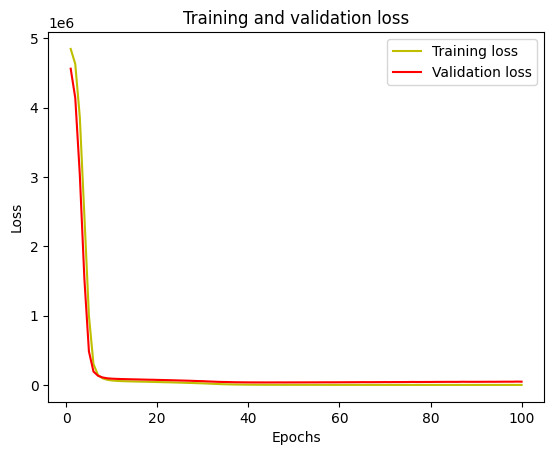

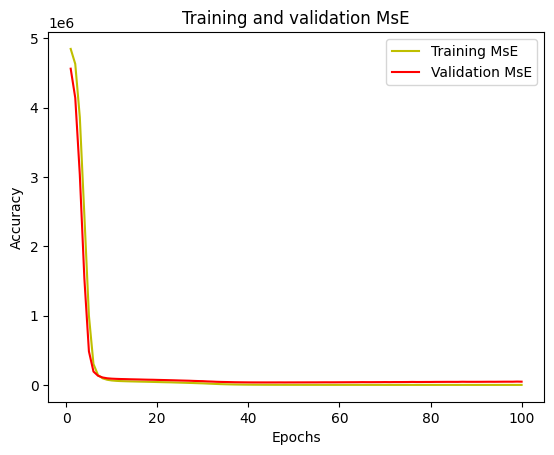

In [99]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mse']
val_acc = history.history['val_mse']
plt.plot(epochs, acc, 'y', label='Training MsE')
plt.plot(epochs, val_acc, 'r', label='Validation MsE')
plt.title('Training and validation MsE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [100]:
y_test

1070    1400.0
288     1600.0
1942     850.0
296     1850.0
1352    1600.0
         ...  
445      600.0
1598    1130.0
72       700.0
509     1850.0
1065     700.0
Name: ModalPrice, Length: 722, dtype: float64

In [101]:
y_pred = model.predict(x_test_scaled)
# y_test = scaler.inverse_transform(y_test)
# y_pred = scaler.inverse_transform(y_pred)
mean_squared_error(y_test, y_pred, squared=False)

23/23 [==============================] - 0s 2ms/step


222.81172556051064

MLP

In [102]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
y_pred = regr.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

199.32146770086794

RNN

In [103]:
def prep_data(datain,temp, time_step):
    # y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)
    # print(type(temp))
    y_indices = np.arange(start=time_step, stop=len(datain), step=time_step)

    # y_tmp = datain[y_indices]

    y_tmp = np.array(temp)
    y_tmp = y_tmp.reshape(-1,1)
    rows_X = len(y_tmp)
    X_tmp = datain[range(time_step*rows_X)]
    # X_tmp = np.reshape(X_tmp, (rows_X, time_step, 1))
    X_tmp = np.reshape(X_tmp, (rows_X, time_step, 8))

    return X_tmp, y_tmp

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled=scaler.fit_transform(x_data)
# y_scaled = scaler.fit_transform(y_data)

# train_data, test_data = train_test_split(x_scaled, test_size=0.2, shuffle=False)

time_step = 1
# X_train, y_train = prep_data(train_data, time_step)
# X_test, y_test = prep_data(test_data, time_step)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size = 0.25, random_state=9)

X_train, Y_train = prep_data(x_train, y_train, time_step)
X_test, Y_test = prep_data(x_test,y_test, time_step)

In [105]:
print(x_data)

      Commodity  State  District  Market  Population  MinPrice  MaxPrice  \
0             0      0         0       0    13606753    1800.0    1900.0   
1             0      0         0       0    13606753     500.0    1000.0   
2             0      0         0       0    13606753     500.0     800.0   
3             0      0         0       0    13606753     500.0     800.0   
4             0      0         0       0    13606753     500.0     800.0   
...         ...    ...       ...     ...         ...       ...       ...   
2881          2      1         1       0     4038000    1800.0    1900.0   
2882          2      1         1       0     4038000    1850.0    1950.0   
2883          2      1         1       0     4038000    1850.0    1950.0   
2884          2      1         1       0     4038000    1800.0    1900.0   
2885          2      1         1       0     4038000    1800.0    1900.0   

      Total_Arrival  
0               0.0  
1            2983.0  
2            5420.0  

In [106]:
print(X_train.shape)
print(Y_train.shape)

(2164, 1, 8)
(2164, 1)


In [107]:
model = Sequential(name="First-RNN-Model")
# model.add(Input(shape=(time_step,1), name='Input-Layer'))
model.add(Input(shape=(1,4), name='Input-Layer'))
model.add(SimpleRNN(units=1, activation='tanh', name='Hidden-Recurrent-Layer'))
model.add(Dense(units=1, activation='tanh', name='Hidden-Layer'))
model.add(Dense(units=1, activation='linear', name='Output-Layer'))

In [108]:
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [109]:
y_pred.shape

(722,)

In [110]:
y_test.shape

(722,)

Inception Time Model


In [111]:
import numpy as np
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras import models
from tensorflow.keras.models import Model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow

In [112]:
# nClasses = 1
nClasses = 1

# X, y = make_classification(n_samples=100000, n_features = 2304, n_informative = 200, n_classes = nClasses)
x_scaled=scaler.fit_transform(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.25,random_state=42)
time_step = 1
#time_step = 7

X_train, Y_train = prep_data(x_train, y_train, time_step)
X_test, Y_test = prep_data(x_test,y_test, time_step)

In [113]:
print(X_train.shape)
print(Y_train.shape)

(2164, 1, 8)
(2164, 1)


In [114]:
y_data

0       1850.0
1        700.0
2        700.0
3        700.0
4        700.0
         ...  
2881    1850.0
2882    1900.0
2883    1900.0
2884    1850.0
2885    1850.0
Name: ModalPrice, Length: 2886, dtype: float64

In [115]:
shape_x = 1
shape_y = 8


In [116]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical


In [117]:

from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, concatenate, LSTM, Reshape, Dense
from keras.callbacks import EarlyStopping

In [131]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, concatenate, Dropout, BatchNormalization, LeakyReLU

# Define input layer
input_tensor = Input(shape=(shape_x, shape_y, 1))

# Convolutional blocks
conv1 = Conv2D(32, (3, 3), padding='same')(input_tensor)
conv1 = BatchNormalization()(conv1)
conv1 = LeakyReLU(alpha=0.1)(conv1)
conv1 = MaxPooling2D((3,1), strides=(1,1), padding='same')(conv1)
conv1 = Dropout(0.25)(conv1)

conv2 = Conv2D(64, (3, 3), padding='same')(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = LeakyReLU(alpha=0.1)(conv2)
conv2 = MaxPooling2D((3,1), strides=(1,1), padding='same')(conv2)
conv2 = Dropout(0.25)(conv2)

# Flatten convolutional output
conv_output = Flatten()(conv2)

# LSTM block
lstm_input = Reshape((conv2.shape[1], conv2.shape[2]*conv2.shape[3]))(conv2)
lstm_output = LSTM(64)(lstm_input)

# Concatenate convolutional and LSTM outputs
combined = concatenate([conv_output, lstm_output])

# Dense layers for classification
dense1 = Dense(128, activation='relu')(combined)
dense1 = Dropout(0.5)(dense1)

dense2 = Dense(64, activation='relu')(dense1)
dense2 = Dropout(0.5)(dense2)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create model
model = Model(inputs=input_tensor, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1, 8, 1)]            0         []                            
                                                                                                  
 conv2d_31 (Conv2D)          (None, 1, 8, 32)             320       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 1, 8, 32)             128       ['conv2d_31[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 leaky_re_lu_39 (LeakyReLU)  (None, 1, 8, 32)             0         ['batch_normalization_3[

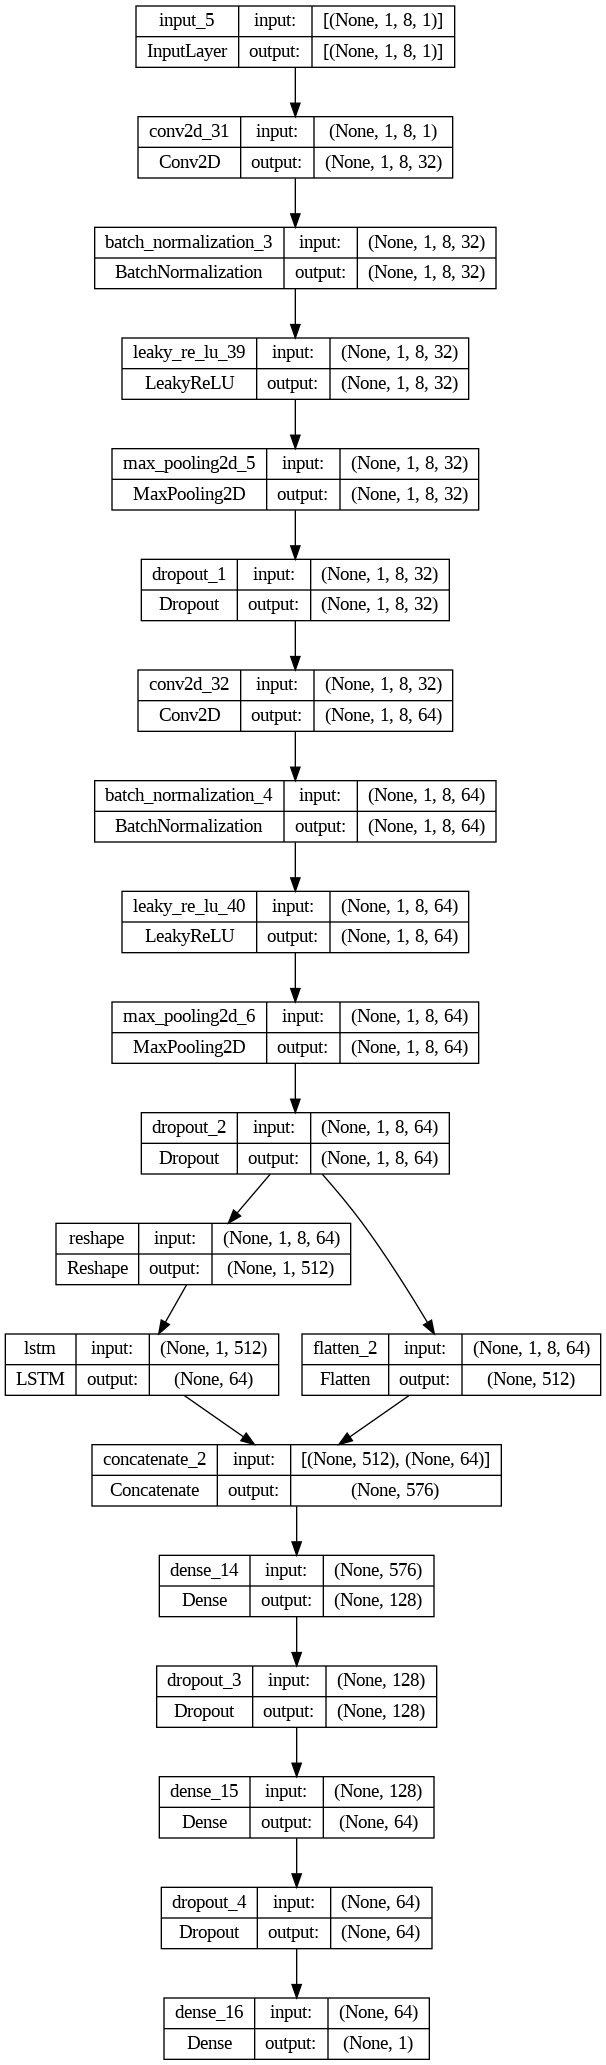

In [132]:
# model = Model([input_tensor], output)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [133]:
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

# batch_size = 512
# epochs = 1
# batch_size = 1024
# epochs = 100

history = model.fit(X_train, # input data
          Y_train, # target data
          batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=50, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
          validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch.
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
         )

Epoch 1/50
68/68 [==============================] - 7s 22ms/step - loss: 5104360.5000 - mean_squared_error: 5104360.5000 - mean_absolute_error: 1801.4006 - val_loss: 3918770.2500 - val_mean_squared_error: 3918770.2500 - val_mean_absolute_error: 1676.9415
Epoch 2/50
68/68 [==============================] - 1s 15ms/step - loss: 5104296.5000 - mean_squared_error: 5104296.5000 - mean_absolute_error: 1801.3831 - val_loss: 3918435.0000 - val_mean_squared_error: 3918435.0000 - val_mean_absolute_error: 1676.8423
Epoch 3/50
68/68 [==============================] - 1s 12ms/step - loss: 5104296.0000 - mean_squared_error: 5104296.0000 - mean_absolute_error: 1801.3831 - val_loss: 3918367.2500 - val_mean_squared_error: 3918367.2500 - val_mean_absolute_error: 1676.8225
Epoch 4/50
68/68 [==============================] - 1s 16ms/step - loss: 5104295.0000 - mean_squared_error: 5104295.0000 - mean_absolute_error: 1801.3831 - val_loss: 3918355.2500 - val_mean_squared_error: 3918355.2500 - val_mean_absolu

In [122]:
y_pred = model.predict(X_test)
mean_squared_error(Y_test, y_pred, squared=False)

23/23 [==============================] - 0s 6ms/step


90.11808587377882

In [123]:
X_test

array([[[0.        , 0.        , 0.        , ..., 0.02871622,
         0.05882353, 0.98325976]],

       [[1.        , 1.        , 1.        , ..., 0.05658784,
         0.03897059, 0.01161609]],

       [[0.5       , 1.        , 1.        , ..., 0.10472973,
         0.08088235, 0.20939011]],

       ...,

       [[1.        , 1.        , 1.        , ..., 0.07516892,
         0.05514706, 0.02541149]],

       [[1.        , 0.        , 0.        , ..., 0.10472973,
         0.13235294, 0.02332168]],

       [[1.        , 0.        , 0.        , ..., 0.14695946,
         0.13970588, 0.01004511]]])

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example input data
input_data = {
    'Date': ['2023-01-06'],  # Example date for prediction (not used in prediction)
    'Commodity': ['Onion'],  # Example value for Commodity
    'State': ['Karnataka'],  # Example value for State
    'District': ['Bangalore'],  # Example value for District
    'Market': [0],
    'Population': [13606753],
    'MinPrice':[500],  # Example value for MinPrice
    'MaxPrice': [800],  # Example value for MaxPrice
    'TotalArrival': [2983]  # Example value for TotalArrival
}

# Create a DataFrame from input_data
input_df = pd.DataFrame(input_data)

# Assuming these are the features your model expects
features = ['Commodity', 'State', 'District', 'Market', 'Population', 'MinPrice', 'MaxPrice', 'TotalArrival']

# Transform categorical columns using LabelEncoder
label_encoders = {}
for feature in features:
    le = LabelEncoder()
    input_df[feature] = le.fit_transform(input_df[feature])
    label_encoders[feature] = le

# Convert input_df to numpy array and reshape
input_array = input_df[features].to_numpy().reshape(-1, 1, len(features), 1)

# Now you can use input_array to predict with your Keras model
predicted_total_arrival = model.predict(input_array)



1/1 [==============================] - 0s 333ms/step


In [125]:
print(predicted_total_arrival)

[[-180.37212]]


In [126]:
import joblib

# Train your model here using your training data

# Save the trained model to a file
joblib.dump(model, 'your_model_filename.pkl')
# Load the saved model from the file
loaded_model = joblib.load('your_model_filename.pkl')

# Now you can use loaded_model for prediction with different input data
predicted_total_arrival = loaded_model.predict(input_array)


1/1 [==============================] - 0s 222ms/step


In [142]:
print(predicted_total_arrival)

32546


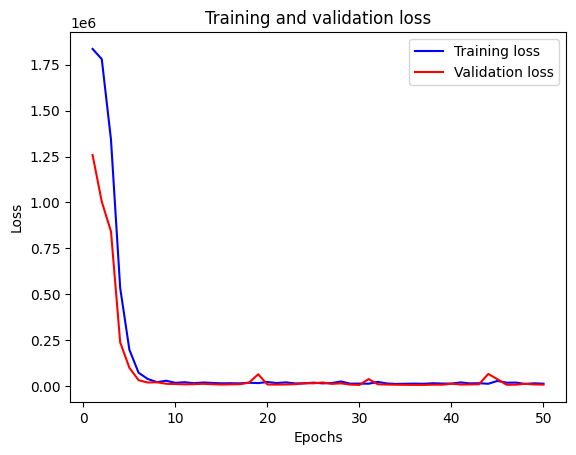

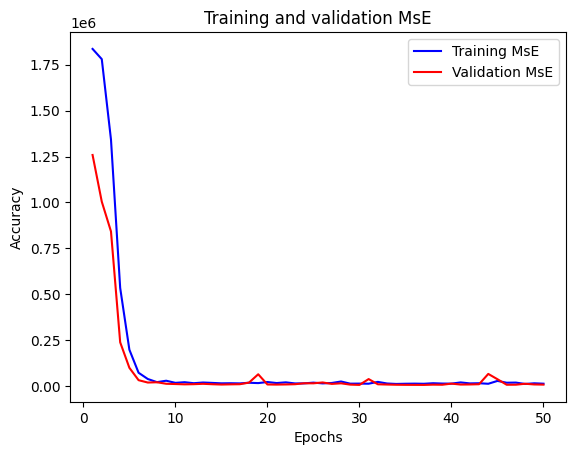

In [143]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'b', label='Training MsE')
plt.plot(epochs, val_acc, 'r', label='Validation MsE')
plt.title('Training and validation MsE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
